In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation


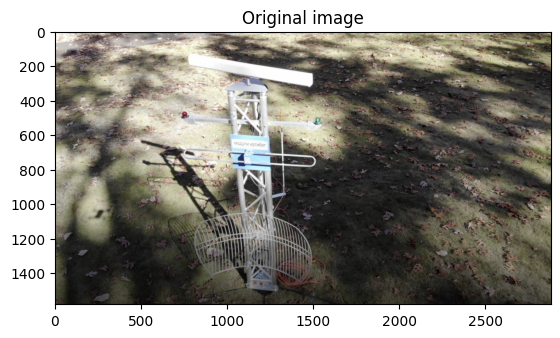

In [70]:
#import and show image
image = cv.imread("mast_frame.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original image')
plt.show()

image = cv.cvtColor(image,cv.COLOR_RGB2BGR)

# cv.imshow("test",image)
# cv.waitKey(0)
# cv.destroyAllWindows()


The corner points are...

A : [1077, 715]
B : [1172, 546]
C : [1324, 724]
D : [1534, 11]


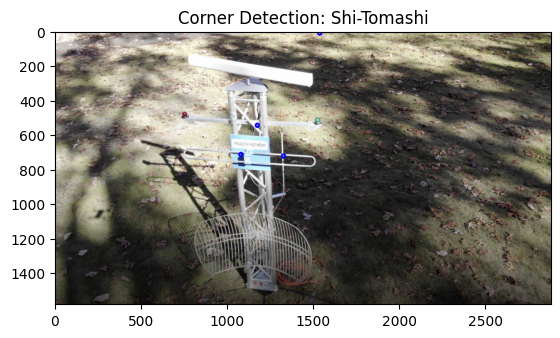

[[1077, 715], [1172, 546], [1324, 724], [1534, 11]]

In [71]:
#testing shi_tomasi
def shi_tomasi(image, radius = -1, show_plots = False):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    # blur = cv.GaussianBlur(gray,(5,5),0)
    blur = cv.bilateralFilter(gray,9,75,75)
    corners = cv.goodFeaturesToTrack(blur, 4, 0.01, 100)
    corners = np.int0(corners)
    corners = sorted(np.concatenate(corners).tolist())
    
    if show_plots :
        print('\nThe corner points are...\n')

        im = image.copy()
        for index, c in enumerate(corners):
            x, y = c
            cv.circle(im, (x, y), 10, (255,0,0), radius)
            if show_plots :
                character = chr(65 + index)
                print(character, ':', c)

    
        plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
        plt.title('Corner Detection: Shi-Tomashi')
        plt.show()
        
    return corners

shi_tomasi(image, radius = 10, show_plots=True)

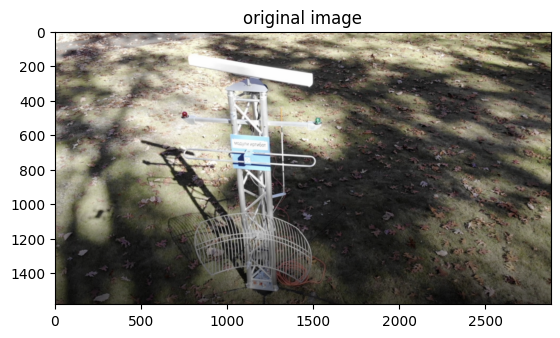

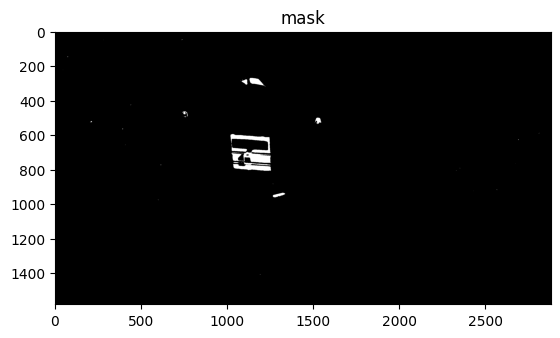

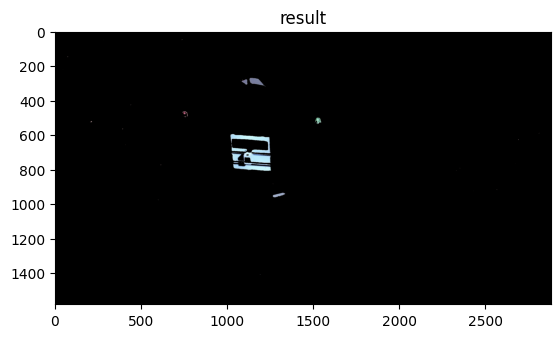

In [72]:
#color filter
def hsv_filter(image, show_plots = False):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Threshold of blue in HSV space
    lower_blue = np.array([60, 35, 140])
    upper_blue = np.array([180, 255, 255])
    # lower_blue = np.array([110,50,50])
    # upper_blue = np.array([130,255,255])

    # preparing the mask to overlay
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # mask = cv.cvtColor(image.)

    # The black region in the mask has the value of 0,
    # so when multiplied with original image removes all non-blue regions
    result = cv.bitwise_and(image, image, mask = mask)

    # mask = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
    # result = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # result = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # plt.subplot(311)
    if show_plots:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        plt.title("original image")
        plt.show()

        # plt.subplot(312)
        plt.imshow(mask, cmap="gray")
        plt.title("mask")
        plt.show()

        # plt.subplot(313)
        plt.imshow(result)
        plt.title("result")
        plt.show()
        
    return result
    # cv.imshow('result',result)
blur = cv.GaussianBlur(image,(5,5),0)
color_filtered = hsv_filter(blur,show_plots=True)


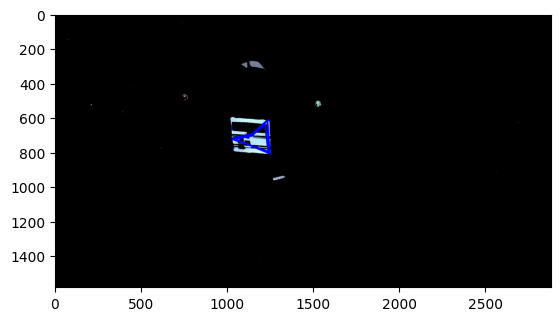

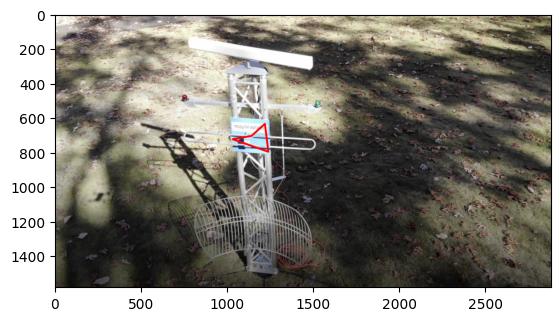

In [77]:
#testing shi_tomasi on color filtered image
corners = shi_tomasi(color_filtered, radius = 10)

#draw shape on image
pts = np.array(corners)
pts = pts.reshape((-1,1,2))
# print(pts)
cv.polylines(color_filtered,[pts],True,(0,0,255),10)

im = image.copy()
cv.polylines(im,[pts],True,(0,0,255),10)

plt.imshow(color_filtered)
plt.show()
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.show()

In [80]:
def draw_polygon_on_frame(image):
    color_filterd = hsv_filter(image)
    track_corners = shi_tomasi(color_filtered, radius = 10)
    im = image.copy()
    cv.polylines(im,[pts],True,(0,0,255),10)
    return im
tracked_img = draw_polygon_on_frame(image)
plt.imshow(cv.cvtColor(tracked_img,cv.COLOR_BGR2RGB))

NameError: name 'cv2' is not defined

In [69]:
#test with video

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

cap = cv.VideoCapture('test_videos/test1.mp4')
frame_width = cap.get(3)
frame_height = cap.get(4)

video = cv.VideoWriter('output_test.avi',cv.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

img = []
frames = []

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    fig = plt.figure()
    plt.imshow(img[i], cmap=cm.Greys_r)

    # put pixel buffer in numpy array
    canvas = FigureCanvas(fig)
    canvas.draw()
    mat = np.array(canvas.renderer._renderer)
    mat = cv2.cvtColor(mat, cv2.COLOR_RGB2BGR)

    # write frame to video
    video.write(mat)

cap.release()


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'VideoWriter'
> Overload resolution failed:
>  - Can't parse 'frameSize'. Sequence item with index 0 has a wrong type
>  - VideoWriter() missing required argument 'frameSize' (pos 5)
>  - VideoWriter() missing required argument 'params' (pos 5)
>  - VideoWriter() missing required argument 'frameSize' (pos 5)
